In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
df = pd.read_csv('ACME-HappinessSurvey2020.csv')
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
df.shape

(126, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [5]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df['Y'].value_counts()

1    69
0    57
Name: Y, dtype: int64

In [7]:
df.isna().any()

Y     False
X1    False
X2    False
X3    False
X4    False
X5    False
X6    False
dtype: bool

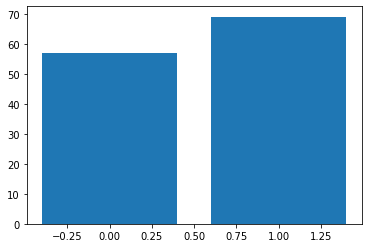

In [8]:
counter = Counter(df['Y'])

plt.bar(counter.keys(), counter.values())
plt.show()

In [9]:
df = df.reset_index(drop=True)

In [10]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, 0:1]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state=33)

In [12]:
columns = X.columns

<AxesSubplot:>

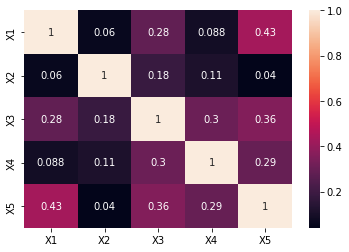

In [13]:
corr_tab = X.corr()
sns.heatmap(corr_tab, annot=True)

In [14]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [15]:
classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    LogisticRegression(),
    XGBClassifier(),
    LGBMClassifier()
]

In [16]:
names = [
    'KNN',
    'SVC',
    'DT',
    'RF',
    'AD',
    'GNB',
    'LR',
    'XG',
    'LGB'
]

In [17]:
accuracy = []

for model in classifiers:
    model.fit(X_train,y_train.ravel())
    ypred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test.ravel(),ypred)*100)

In [18]:
modelsAcc = pd.DataFrame({'Model': names, 'Accuracy': accuracy})
modelsAcc

,Model,Accuracy
0,KNN,69.230769
1,SVC,69.230769
2,DT,69.230769
3,RF,76.923077
4,AD,61.538462
5,GNB,61.538462
6,LR,61.538462
7,XG,69.230769
8,LGB,84.615385


In [19]:
lgparams = {
            'n_estimators': [100,200,300],
             'reg_lambda':[0.0,0.1,0.01],
            'learning_rate': [0.01, 0.1],
            'num_leaves': [10, 20, 30, 40],
             'reg_alpha':[0.0,0.1,0.01]
}

In [20]:
lgb_grid = GridSearchCV(LGBMClassifier(),lgparams,scoring="accuracy",cv=3,verbose=1)

In [21]:
lgb_grid.fit(X_train,y_train.ravel())

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [10, 20, 30, 40],
                         'reg_alpha': [0.0, 0.1, 0.01],
                         'reg_lambda': [0.0, 0.1, 0.01]},
             scoring='accuracy', verbose=1)

In [22]:
y_pred_lgb=lgb_grid.predict(X_test)

In [23]:
print(accuracy_score(y_test.ravel(),y_pred_lgb)*100)

76.92307692307693


In [24]:
lgb_grid.best_params_

{'learning_rate': 0.1,
 'n_estimators': 100,
 'num_leaves': 10,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1}

In [25]:
print(classification_report(y_test.ravel(),y_pred_lgb))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.88      0.78      0.82         9

    accuracy                           0.77        13
   macro avg       0.74      0.76      0.75        13
weighted avg       0.79      0.77      0.78        13



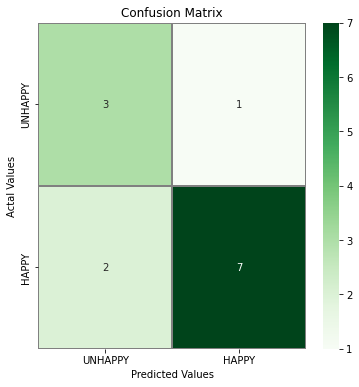

In [26]:
cm = confusion_matrix(y_test.ravel(),y_pred_lgb)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['UNHAPPY','HAPPY'], 
                     columns = ['UNHAPPY','HAPPY'])

plt.figure(figsize=(6,6))
sns.heatmap(cm_df, annot=True,linewidths=0.01,cmap="Greens", linecolor="gray")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [27]:
feature_names = list(lgb_grid.best_estimator_.feature_name_)

In [28]:
feature_importance =list(lgb_grid.best_estimator_.feature_importances_)

In [29]:
ft_importances_table = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
ft_importances_table

,Feature,Importance
0,X1,64
1,X2,81
2,X3,52
3,X4,16
4,X5,76


In [30]:

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_lgb)
    roc_auc[i] = auc(fpr[i], tpr[i])

print(roc_auc_score(y_test, y_pred_lgb))

0.7638888888888888


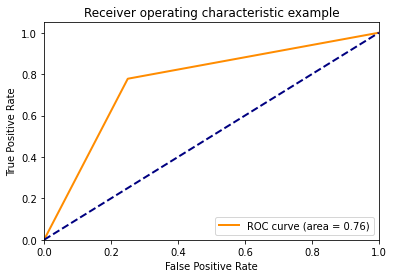

In [31]:
plt.figure()
lw = 2
plt.plot(
    fpr[1],
    tpr[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[1],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()